## Example 9.4: Comparing two methods of teaching
Suppose you wish to compare a new method of teaching reading to slow learners to the current standard method.  You decide to base this comparison on the results of a reading test given at the end of a learning period of six months. Of a random sample of 22 slow learners 10 are taught by the new method and 12 are taught by the standard method all 22 children are taught by qualified instructors under similar conditions for a six-month period. The results of the reading test are given in READING.CSV.

1. Use the data in the CSV-file to estimate the true mean difference between the test scores for the new method and the standard method. Use a 95% confidence interval.

Let's load the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
%matplotlib inline

df = pd.read_csv('READING.CSV')
# We make a new dataframe with selecting the row that are NEW in the column METHODS and the column SCORE.
df1 = df.loc [df['METHOD'] =='NEW', ['SCORE']]
df2 = df.loc [df['METHOD'] =='STD', ['SCORE']]
print(df)

print(df1)
print(df2)

   METHOD  SCORE
0     NEW     70
1     NEW     85
2     NEW     80
3     NEW     76
4     NEW     80
5     NEW     66
6     NEW     71
7     NEW     79
8     NEW     81
9     NEW     76
10    STD     79
11    STD     73
12    STD     72
13    STD     62
14    STD     76
15    STD     68
16    STD     70
17    STD     86
18    STD     75
19    STD     68
20    STD     73
21    STD     66
   SCORE
0     70
1     85
2     80
3     76
4     80
5     66
6     71
7     79
8     81
9     76
    SCORE
10     79
11     73
12     72
13     62
14     76
15     68
16     70
17     86
18     75
19     68
20     73
21     66


Calculate the mean and the standard deviation of x1 samples.

In [2]:
xb1 = df1['SCORE'].mean()
s1 = df1['SCORE'].std(ddof = 1)
n1 = len(df1)
sm1 = s1 / np.sqrt(n1)
print('sample mean: ',xb1)
print('standard devitation sample (unbiased): ',s1)
print('number of observations in the sample: ',n1)
print('standard devitation sample mean (standard error of the mean): ',sm1)

sample mean:  76.4
standard devitation sample (unbiased):  5.834761729877618
number of observations in the sample:  10
standard devitation sample mean (standard error of the mean):  1.84511366707974


Calculate the mean and the standard deviation of x2 samples.

In [3]:
xb2 = df2['SCORE'].mean()
s2 = df2['SCORE'].std(ddof = 1)
n2 = len(df2)
sm2 = s2 / np.sqrt(n2)
print('sample mean: ',xb2)
print('standard devitation sample (unbiased): ',s2)
print('number of observations in the sample: ',n2)
print('standard devitation sample mean (standard error of the mean): ',sm2)

sample mean:  72.33333333333333
standard devitation sample (unbiased):  6.343691688790073
number of observations in the sample:  12
standard devitation sample mean (standard error of the mean):  1.8312660520894701


Calculate the boundaries of the confidence interval using student's t-statistic

In [4]:
alpha = 0.05
rv = sts.t(n1+n2-2)
tt = - rv.ppf(alpha/2)
print ('t_alpha/2 ',tt) 

t_alpha/2  2.085963447265837


Calculate the standard error of the sampling distribution.
We use the pooled-variance.


In [5]:
# Pooled-variance as estimate of the variance of the population
varp =  ((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2)
# estimate of the standard error
st_er = np.sqrt(varp*(1/n1 + 1/n2))
print ('std sampling distribution (standard error) ',st_er)



std sampling distribution (standard error)  2.6203901321071346


95% Confidence interval 


In [6]:
# sampling error
SE = tt * st_er

#%% 95% Confidence interval 

print('95% confidence interval: ',[(xb1 - xb2 - SE), (xb1 - xb2 + SE)])


95% confidence interval:  [-1.3993713664849032, 9.532704699818257]


2. Interpret the interval

With a confidence coefficient equal to 0.95, we estimate that the difference in mean test scores between using the new method  of teaching and using the standard method falls into the interval -1.40 and 9.53.
Zero is included in the interval hence not sufficient evidence that the new method is better.

3. What assumptions must be made in order that the estimate is valid?

a. The samples are randomly and independently selected from the populations of slow learners taught by the new method and the standard method.

On the basis of the information provided about the sampling procedure in the discription of the problem, this assumption is satisfied.

b. The test scores are normally distributed for both teaching methods.

Let's look at the probability plot:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html


Text(0.5, 1.0, 'probability map x2')

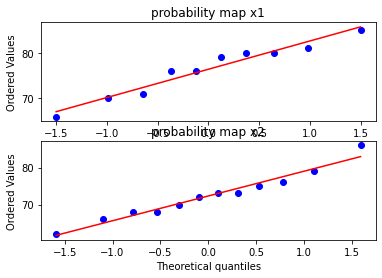

In [7]:
fig = plt.figure()
ax = fig.add_subplot(211)
res = sts.probplot(df1['SCORE'],plot = ax)
plt.title('probability map x1')

ax = fig.add_subplot(212)
res = sts.probplot(df2['SCORE'],plot = ax)
plt.title('probability map x2')


c. The variance of the test scores is the same for the two populations.

We check this with the box plots. In section 6 we will see a more quantitative way to check the variances.

Making a 2-D array only works if all the columns are the same length. If they are not, then use a list instead. This is actually more efficient because boxplot converts a 2-D array into a list of vectors internally anyway.



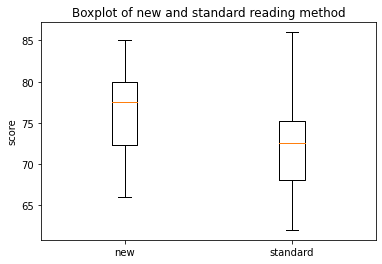

In [8]:

fig = plt.figure()
plt.title('Boxplot of new and standard reading method')
plt.boxplot([df1['SCORE'],df2['SCORE']],labels = ['new','standard'] )
plt.ylabel('score')

plt.show()

Both boxes appear to have about the same spread.

Let's revisite this assumption of equal variance by testing a hypothesis.

1. What is the null hypothesis and the  is the alternative hypothesis?
 

$H_0 : \sigma_1^2 / \sigma_2^2 = 1 $ 

$H_a : \sigma_1^2 / \sigma_2^2 \neq 1 $

It is a two-tailed test.

2. Let's  calculate the sample variances.


In [9]:
v1 = s1**2
v2 = s2**2
print('variance sample1 (unbiased): ',v1)
print('variance sample2 (unbiased): ',v2)

variance sample1 (unbiased):  34.04444444444446
variance sample2 (unbiased):  40.24242424242424


3. F-statistic.
The largest variance / smallest variance

In [10]:
F = v2/v1
print('F-statistic: ',F)


F-statistic:  1.182055542368858


4. What is the rejection region?

In [11]:
alpha = 0.1

ff =  sts.f.ppf(1-alpha/2,n2-1,n1-1)
print ('F_alpha/2 ',ff) 
print('in rejection region? ',F > ff)



F_alpha/2  3.1024854075283774
in rejection region?  False


5. Conclusion
We have insufficient evidence to reject the null hypothesis in favor of the alternative hypothesis at an alpha 0,1 level of significance. 

6. Practical conclusion
We cannot show that the variances are different.

7. What is the observed significance level?

In [12]:
p = 2*(1-sts.f.cdf(F,n2-1,n1-1))
print('The observed significance level: ', p)

The observed significance level:  0.8147505689290377


This is clearly larger than $\alpha = 0.1$, hence we cannot reject $H_0$ in favor for $H_a$.
8. What is the 95% confidence interval for $\sigma_1^2/\sigma_2^2$?

In [13]:
alpha = 0.05
fu = sts.f.ppf(1-alpha/2,n2-1,n1-1)
fl = sts.f.ppf(alpha/2,n2-1,n1-1)
print('Confidence interval: ',fl*v1/v2,'  ',fu*v1/v2 )

Confidence interval:  0.235788134995919    3.3095521547385984


Conclusion we can see that 1 is  incorporated in the interval. We cannot show that  $\sigma_1^2 \neq \sigma_2^2$.